# NOTE

You need to `pareto-front-experiment.py` multiple times with different arguments, uplodad the results on Wandb plateform, download the results and store them in a `metrics.pkl` file. The sole purpose of this notebook is to generate the graph.  
  

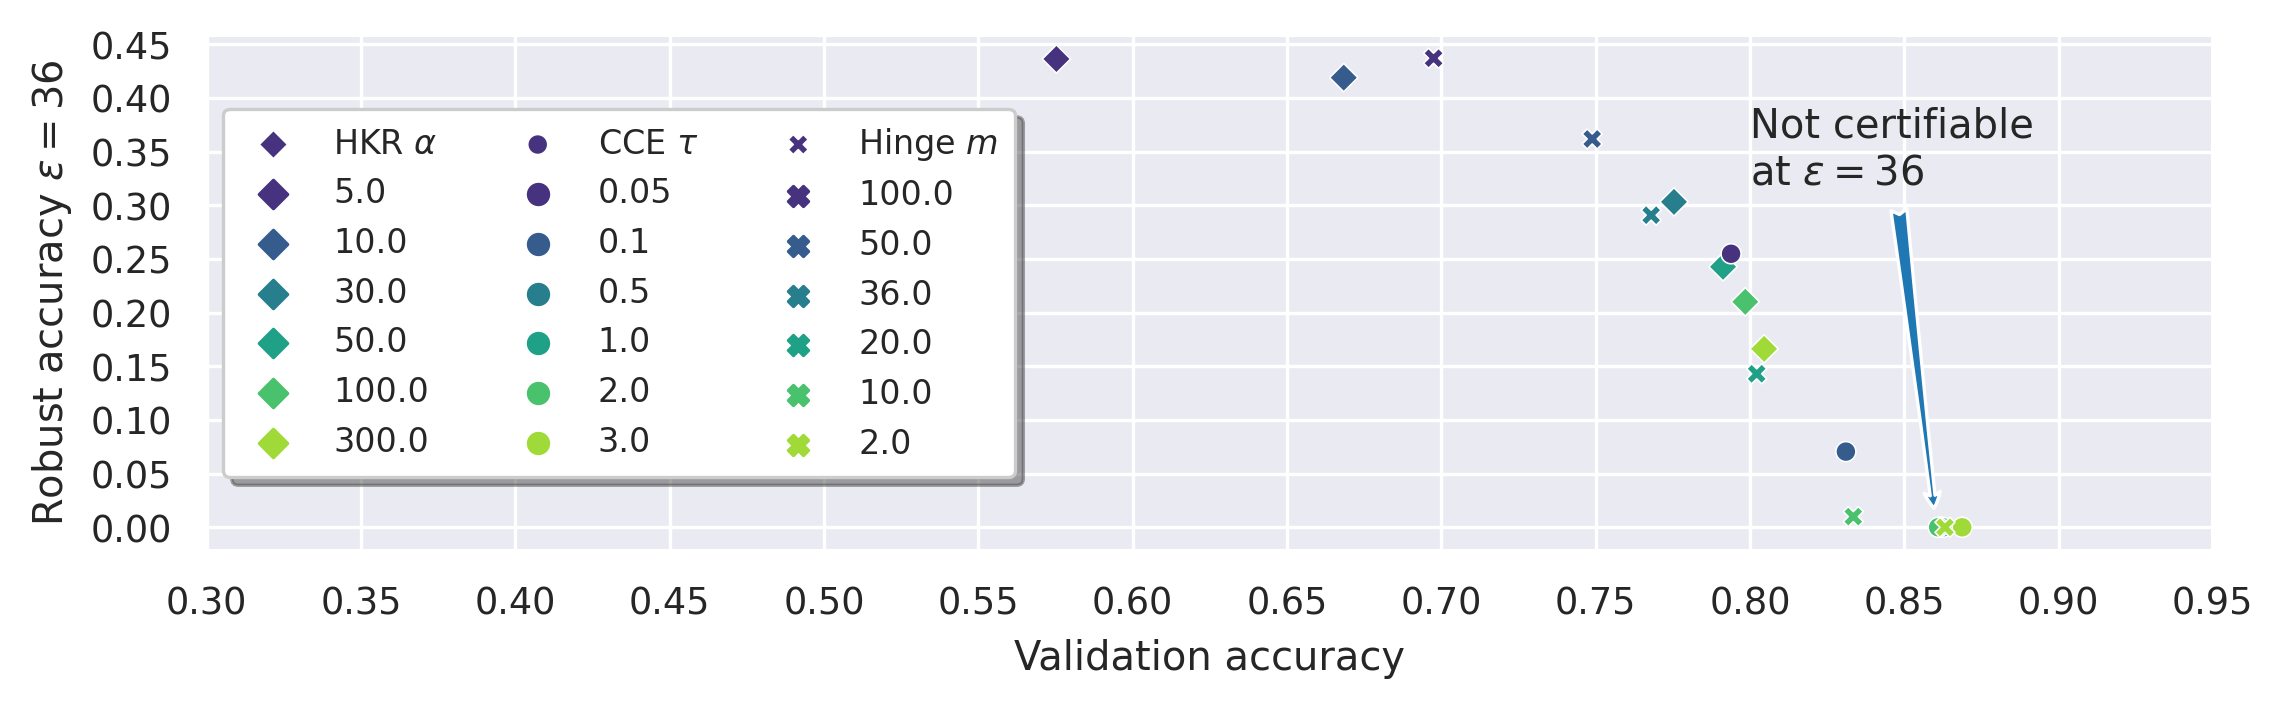

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D


def plot(yvar):
  metrics = pd.read_pickle("metrics.pkl")
  sns.set_style("darkgrid")
  sns.set_context("paper")

  # yvar = "prov_acc_36"
  # yvar = "prov_avg_rob"
  # yvar = "val_prov_avg_nrob"
  # 'val_avg_rob','val_prov_acc_36',
  # 'val_prov_acc_72', 'val_prov_acc_108'

  ylabel = {"prov_acc_36":"Robust accuracy $\epsilon=36$",
            "prov_avg_rob":"Certifiable Robustness"}

  isval = yvar.split("_")[0] == "val"
  xvar = "accuracy"
  try:
    margin=int(yvar.split("_")[-1])
  except:
    margin=1.0

  query = "(name=='HKR')|(name=='CCE')|(name=='hinge')"
  metrics = metrics.query(query)
  
  query_hkr = metrics.query("(name=='HKR')&(m=='20')").drop(columns=['tau']).dropna().astype({'alpha':'float64'}).sort_values(by=['alpha'])
  query_hinge = metrics.query("(name=='hinge')").drop(columns=['tau','alpha']).dropna().astype({'m':'float64'}).sort_values(by=['m'], ascending=False)
  query_cce = metrics.query("(name=='CCE')").drop(columns=['m','alpha']).dropna().astype({'tau':'float64'}).sort_values(by=['tau'])

  fig, ax = plt.subplots(figsize=(22*0.35, 7*0.35), dpi=300)
  cce_msg = r'CCE $\tau$'
  hinge_msg = r'Hinge $m$'
  hkr_msg = r'HKR $\alpha$'

  palette = 'viridis'
  palette_cce = palette #sns.color_palette("ch:s=-.2,r=.6")
  palette_hinge = palette # sns.color_palette("ch:start=.2,rot=-.3") #'Blues_r'
  palette_hkr = palette #sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95) #'flare'

  g = sns.scatterplot(x=xvar, y=yvar, hue='tau', marker="o", data=query_cce.astype({'tau':'str'}), palette=palette_cce, label=cce_msg)
  g = sns.scatterplot(x=xvar, y=yvar, hue='m', marker="X",  data=query_hinge.astype({'m':'str'}), palette=palette_hinge, label=hinge_msg)
  g = sns.scatterplot(x=xvar, y=yvar, hue='alpha', marker="D", data=query_hkr.astype({'alpha':'str'}), palette=palette_hkr, label=hkr_msg)
  
  g.set_xticks(np.arange(0.3, 1.0, 0.05))
  if yvar.endswith("rob"):
    # g.set_yticks(np.arange(0, 30.0, 10))
    # g.set_ylim(bottom=0.)
    pass
  else:
    g.set_yticks(np.arange(0., 0.5, 0.05))

  handles, labels = ax.get_legend_handles_labels()
  num_plot = len(handles) // 3

  p1 = handles[0].get_paths()[0]
  p2 = handles[num_plot].get_paths()[0]
  p3 = handles[2*num_plot].get_paths()[0]

  reverse = False
  if reverse:
    handles = handles[:num_plot] + handles[2*num_plot-1:num_plot-1:-1] + handles[2*num_plot:]
    labels = labels[:num_plot] + labels[2*num_plot-1:num_plot-1:-1] + labels[2*num_plot:]

  for i in range(1,num_plot):
    handles[i].set_paths((p1,)+handles[i].get_paths()[1:])
    handles[i+num_plot-1].set_paths((p2,)+handles[num_plot+i-1].get_paths()[1:])
    handles[i+2*num_plot].set_paths((p3,)+handles[2*num_plot+i].get_paths()[1:])

  if reverse:
    handles = handles[:num_plot] + [handles[2*num_plot-1]] + handles[num_plot:2*num_plot-1] + handles[2*num_plot:]
    labels = labels[:num_plot] + [labels[2*num_plot-1]] + labels[num_plot:2*num_plot-1] + labels[2*num_plot:]

  handles[0].set_sizes(handles[1].get_sizes())
  handles[num_plot].set_sizes(handles[num_plot+1].get_sizes())
  handles[2*num_plot].set_sizes(handles[2*num_plot+1].get_sizes())

  plt.annotate('Not certifiable\nat $\epsilon=36$', xy=(0.86, 0.01), xytext=(0.80, 0.32), arrowprops=dict(arrowstyle='fancy'))
  plt.legend(handles, labels, loc="center left", #bbox_to_anchor=(1., 0.5), 
             fancybox=True, shadow=True, borderpad=0.5, ncol=3, frameon=True,
             facecolor='white', fontsize=8)
  plt.xlabel("Validation accuracy")
  plt.ylabel(ylabel[yvar])
  plt.tight_layout()
  # plt.savefig("pareto_accrob_cifar10.png")

plot("prov_acc_36")